# Rocket staging

In [1]:
# this line makes figures interactive in Jupyter notebooks
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

## Multistage rocket: similar stages

For a multistage rocket with $N$ similar stages, meaning each stage has the same
effective exhaust velocity $c$ (equivalent to the same specific impulse $I_{\text{sp}}$)
and structural ratio $\epsilon$, the structural/empty mass $m_s$ and propellant mass $m_p$
for the $i$th stage can be calculated:

$$
\begin{align*}
m_{s,i} &= \frac{ \left(1 - \pi_{\text{PL}}^{1/N} \right) \epsilon}{\pi_{\text{PL}}^{(N+1-i)/N}} m_{\text{PL}} \\
m_{p,i} &= \frac{ \left(1 - \pi_{\text{PL}}^{1/N} \right) (1-\epsilon)}{\pi_{\text{PL}}^{(N+1-i)/N}} m_{\text{PL}} \;,
\end{align*}
$$

where $m_{\text{PL}}$ is the payload mass and $\pi_{\text{PL}}$ is the payload fraction
($m_{\text{PL}} / m_0$).

The overall burnout velocity for an $N$-stage rocket is then

$$
v_{bo,N} = c N \log\left( \frac{1}{\pi_{\text{PL}}^{1/N} (1-\epsilon) + \epsilon} \right) \;.
$$

For an infinite number of stages, the burnout velocity would be

$$
v_{bo, \infty} = c (1 - \epsilon) \log \left( \frac{1}{\pi_{\text{PL}}} \right) \;.
$$

## Example: varying number of stages

How does the achievable burnout velocity—which is the maximum $\Delta v$ for a launch vehicle—increase as the number of stages increases? How does this compare with
the maximum theoretical velocity?

Determine for a multistage rocket with similar stages, each with $\epsilon = 0.2$,
$c = 3000$ m/s, and an initial mass to payload mass ratio $\frac{m_0}{m_{\text{PL}}} = 30$.

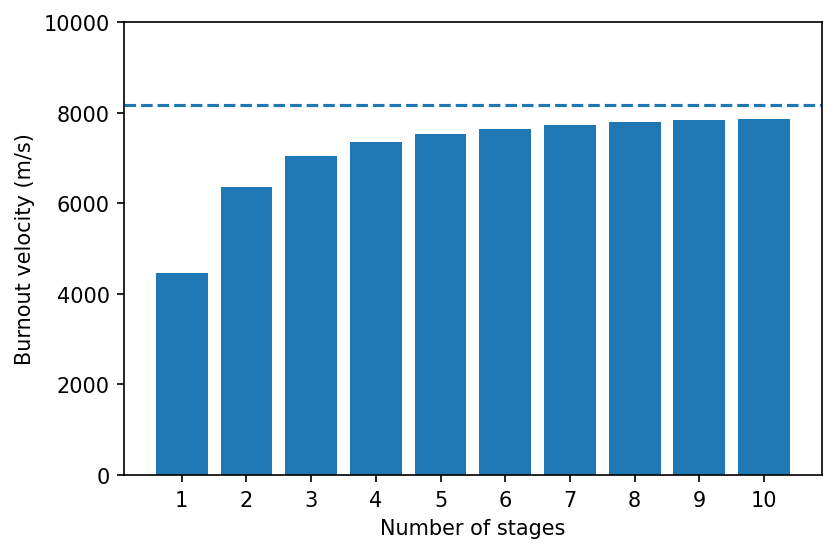

In [22]:
import numpy as np

struct_coeff = 0.2
eff_exhaust_velocity = 3000
m0_mPL = 30

payload_frac = 1 / 30
max_stages = 10

stages = list(range(1, max_stages + 1))
delta_v = np.zeros(max_stages)
for idx, N in enumerate(stages):
    delta_v[idx] = eff_exhaust_velocity * N * np.log(
        1 / (payload_frac**(1/N) * (1 - struct_coeff) + struct_coeff)
        )

delta_v_inf = eff_exhaust_velocity * (1 - struct_coeff) * np.log(1 / payload_frac)

plt.bar(stages, delta_v)
plt.xlabel('Number of stages')
plt.xticks(stages)
plt.ylim([0, 10000])
plt.ylabel('Burnout velocity (m/s)')
plt.axhline(delta_v_inf, ls='--')
plt.show()

In Matlab:

```{code-block} matlab
clear; clc

epsilon = 0.2;
c = 3000;
m0_mPL = 30;

max_stages = 10;
delta_v = zeros(max_stages, 1);

pi_PL = 1 / m0_mPL;

for N = 1 : max_stages
    delta_v(N) = c * N * log(1 / (pi_PL^(1/N) * (1 - epsilon) + epsilon));
end

delta_v_inf = c * (1 - epsilon) * log(1 / pi_PL);

bar(1:max_stages, delta_v)
hold on
yline(delta_v_inf, '--')
```